# Introduction to Deep Learning

#####  Jiajing Chen     

##### June, 29, 2018

## 1. Tensors and NumPy
Tensors are containers for numbers and a generalization of matrices to an arbitrary number of dimensions (or axes). In general, all current machine-learning systems use tensors as their basic data structure. NumPy is a Python module designed for scientific computation and has several very useful features. NumPy arrays are actually tensors. NumPy also provides many useful tools to help you perform linear algebra, generate random numbers, and much much more. More info about NumPy here.

NumPy arrays are an additional data type provided by NumPy and they are used for representing vectors and matrices. Unlike dynamically growing Python lists, NumPy arrays have a size that is fixed when they are constructed. Elements of NumPy arrays are also all of the same data type (by default floating point numbers), leading to more efficient and simpler code than using Python's standard data types.


In [1]:
# import packages
import numpy as np
import keras
from keras.datasets import mnist
from keras import layers
from keras import models
from keras.utils import to_categorical
from keras.applications import VGG16

/anaconda/envs/py3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### Scalars (0D tensors)
A tensor that contains only one number is a scalar tensor, or 0-dimensional tensor, or 0D tensor.

In [2]:
x = np.array(9)
print (x.ndim)
print (x.shape)

0
()


#### Vectors (1D tensors)
A list or array of numbers is called a vector, or 1D tensor.

In [3]:
x = np.array([1, 2, 3, 4])
print (x.ndim)
print (x.shape)

1
(4,)


#### Matrices (2D tensors)
An array of vectors is a matrix, or 2D tensor. The entries from the first axis are called rows and the entries from the second axis are called columns. In the following example, [1, 2, 3, 4, 5] is the first row and [1, 6, 11] is the first column.

In [4]:
x = np.array([[1, 2, 3, 4, 5],
             [6, 7, 8, 9, 10],
             [11, 12, 13, 14, 15]])
print (x.ndim)
print (x.shape)

2
(3, 5)


#### 3D tensors and higher-dimensional tensors
If you pack multiple matrices into a new array, you obtain a 3D tensor, which you can visually interpret as a cube of numbers. An example is below. By packing 3D tensors into an array you can create a 4D tensor, and so on. In general, deep learning only involves 0D to 4D tensors, although video data requires 5D.

In [5]:
x = np.array([[[1, 2, 3, 4, 5],
             [6, 7, 8, 9, 10],
             [11, 12, 13, 14, 15]],
             [[1, 2, 3, 4, 5],
             [6, 7, 8, 9, 10],
             [11, 12, 13, 14, 15]],
             [[1, 2, 3, 4, 5],
             [6, 7, 8, 9, 10],
             [11, 12, 13, 14, 15]]])
print (x.ndim)
print (x.shape)

3
(3, 3, 5)


### Key attributes of tensors

- Number of axes (rank) - ndim in python.
- Shape - A tuple of integers that describes how many dimensions the tensor has along each axis. In the previous example, the tensor has shape (3, 3, 5). There are 3 matrices, each with 3 rows and 5 columns. Note that a vector has shape (n, ) where n is the length of the vector, whereas a scalar has an empty shape, ().
- Data type - dtype in python. This is the type of the data contained in the tensor. For example, a tensor's type could be float32, uint8, float64 and so on. Note that string tensors don't exist in Numpy (or in most other libraries).

## Tensor Operations

### Broadcasting
Broadcasting allows element-wise operations between two tensors with different shapes (when possible). The smaller tensor will be broadcasted to match the shape of the larger tensor. This happens in 2 steps:
- Axes (called broadcast axes are added to the smaller tensor to match the ndim of the larger tensor.
- The smaller tensor is repeated alongside these new axes to match the full shape of the larger tensor.
As an example, consider X with shape (32, 10) and y with shape (10, ). First, we add an empty first axis to y, whose shape becomes (1, 10). Then, we repeat y 32 times alongside this new axis, so that we end up with a tensor Y with shape (32, 10) where Y[i, :] == y for i in range(0, 32). Now we can easily perform different operations, like addition, to X and Y.


In [6]:


X = np.random.random((24, 3, 32, 10))  # A random tensor with shape (64, 3, 32, 10)
y = np.random.random((32, 10))         # A random tensor with shape (32, 10)

Z = np.maximum(X, y)  # The ouput Z has shape (64, 3, 32, 10) like X
print (Z.shape)
K = X + y
print (K.shape)

(24, 3, 32, 10)
(24, 3, 32, 10)


#### Tensor Dot
The dot operation, or tensor product is the most common and morst useful tensor operation. Don't confuse it with an element-wise product - it combines entries in the input vectors. In python, the dot operator is used: z = np.dot(x,y). Note that for matrices, you can only take the dot product if x.shape[1] == y.shape[0]. The result is a matrix with shape x.shape[0] == y.shape[1].

#### Tensor Reshaping
Reshaping a tensor means rearranging its rows and columns to match a target shape. For example:

In [7]:
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])
print(x.shape)


(3, 2)


In [8]:
x = x.reshape((6, 1))
print(x)

[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]


In [9]:
x = x.reshape((2, 3))
print(x)


[[0. 1. 2.]
 [3. 4. 5.]]


In [10]:
x = np.zeros((300, 20))  # Creates an all-zeros matrix of shape (300,20)
x = np.transpose(x)
print(x.shape)

(20, 300)


#### Example - MNIST Data
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. Let's play around with it.

In [11]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.ndim)  # Number of axes or dimensions
print(train_images.shape) # Tensor Shape
print(train_images.dtype) # Data type


3
(60000, 28, 28)
uint8


We have a 3D tensor of 60,000 matrices of 28 x 28 integers. Each matrix is a greyscale image with coefficients between 0 and 255. Let's look at a specific digit:

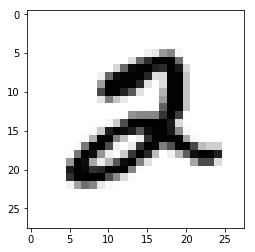

In [12]:
digit = train_images[5] # Display the 6th digit in the training sample

import matplotlib.pyplot as plt
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [13]:
print (digit[5:25,5:23])

[[  0   0   0   0   0   0   0   0   0   0  13  25 100 122   7   0   0   0]
 [  0   0   0   0   0   0   0   0  33 151 208 252 252 252 146   0   0   0]
 [  0   0   0   0   0   0  40 152 244 252 253 224 211 252 232  40   0   0]
 [  0   0   0   0  15 152 239 252 252 252 216  31  37 252 252  60   0   0]
 [  0   0   0   0  96 252 252 252 252 217  29   0  37 252 252  60   0   0]
 [  0   0   0   0 181 252 252 220 167  30   0   0  77 252 252  60   0   0]
 [  0   0   0   0  26 128  58  22   0   0   0   0 100 252 252  60   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 157 252 252  60   0   0]
 [  0   0   0   0   0   0   0   0 110 121 122 121 202 252 194   3   0   0]
 [  0   0   0   0   0  10  53 179 253 253 255 253 253 228  35   0   0   0]
 [  0   0   0   5  54 227 252 243 228 170 242 252 252 231 117   6   0   0]
 [  0   0   6  78 252 252 125  59   0  18 208 252 252 252 252  87   7   0]
 [  0   5 135 252 252 180  16   0  21 203 253 247 129 173 252 252 184  66]
 [  3 136 252 241 106  17

By selecting a specific digit, we are selecting a specific element in a tensor, which is known as tensor slicing. The following code shows 3 different ways of selecting digits #10 to #100, each giving you the same object. The commas inside the brackets separate the different axes. In general, the first axis (axis 0 because indexing starts at 0 in python) will be the samples axis (sometimes called the samples dimension). In the MNIST data set, samples are images of digits. Including a : means use all elements in this axis.

In [14]:
print (train_labels[5])

2


In [15]:
my_slice = train_images[10:100]
print(my_slice.shape)

my_slice = train_images[10:100, :, :]       # Equivalent to the previous example
print(my_slice.shape)

my_slice = train_images[10:100, 0:28, 0:28] # Also equivalent to the previous example
print(my_slice.shape)

(90, 28, 28)
(90, 28, 28)
(90, 28, 28)


## 2. Examples of CNN on MNIST dataset

First, let's take a practical look at a very simple convnet example. We will use our convnet to classify MNIST digits, a task that you've already been 
through in Chapter 2, using a densely-connected network (our test accuracy then was 97.8%). 

The 6 lines of code below show you what a basic convnet looks like. It's a stack of `Conv2D` and `MaxPooling2D` layers. We'll see in a 
minute what they do concretely.
Importantly, a convnet takes as input tensors of shape `(image_height, image_width, image_channels)` (not including the batch dimension). 
In our case, we will configure our convnet to process inputs of size `(28, 28, 1)`, which is the format of MNIST images. We do this via 
passing the argument `input_shape=(28, 28, 1)` to our first layer.

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


You can see above that the output of every `Conv2D` and `MaxPooling2D` layer is a 3D tensor of shape `(height, width, channels)`. The width 
and height dimensions tend to shrink as we go deeper in the network. The number of channels is controlled by the first argument passed to 
the `Conv2D` layers (e.g. 32 or 64).

The next step would be to feed our last output tensor (of shape `(3, 3, 64)`) into a densely-connected classifier network like those you are 
already familiar with: a stack of `Dense` layers. These classifiers process vectors, which are 1D, whereas our current output is a 3D tensor. 
So first, we will have to flatten our 3D outputs to 1D, and then add a few `Dense` layers on top:

In [18]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

We are going to do 10-class classification, so we use a final layer with 10 outputs and a softmax (also known as multinomial classification) activation. Now here's what our network 
looks like:

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

As you can see, our `(3, 3, 64)` outputs were flattened into vectors of shape `(576,)`, before going through two `Dense` layers.

Now, let's train our convnet on the MNIST digits. We will reuse a lot of the code we have already covered in the MNIST example from Chapter 
2.

In [20]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [21]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 35s 588us/step - loss: 0.1790 - acc: 0.9438
Epoch 2/5
60000/60000 [==============================] - 32s 537us/step - loss: 0.0494 - acc: 0.9844
Epoch 3/5
60000/60000 [==============================] - 32s 541us/step - loss: 0.0346 - acc: 0.9891
Epoch 4/5
60000/60000 [==============================] - 32s 537us/step - loss: 0.0260 - acc: 0.9922
Epoch 5/5
60000/60000 [==============================] - 32s 535us/step - loss: 0.0203 - acc: 0.9938


Let's evaluate the model on the test data:

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 186us/step


In [23]:
test_acc

0.9822

Yeah! We got an accuracy of 0.99!

### A quick look at a pre-trained convnet: VGG

In [24]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))

Here's the detail of the architecture of the VGG16 convolutional base: 

In [25]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

## 3. Example of RNN on IMDB dataset
### The IMDB dataset


We'll be working with "IMDB dataset", a set of 50,000 highly-polarized reviews from the Internet Movie Database. They are split into 25,000 
reviews for training and 25,000 reviews for testing, each set consisting in 50% negative and 50% positive reviews.

Why do we have these two separate training and test sets? You should never test a machine learning model on the same data that you used to 
train it! Just because a model performs well on its training data doesn't mean that it will perform well on data it has never seen, and 
what you actually care about is your model's performance on new data (since you already know the labels of your training data -- obviously 
you don't need your model to predict those). For instance, it is possible that your model could end up merely _memorizing_ a mapping between 
your training samples and their targets -- which would be completely useless for the task of predicting targets for data never seen before. 
We will go over this point in much more detail in future lectures.

Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. It has already been preprocessed: the reviews (sequences of words) 
have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.

The following code will load the dataset (when you run it for the first time, about 80MB of data will be downloaded to your machine):

In [26]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

The argument `num_words=10000` means that we will only keep the top 10,000 most frequently occurring words in the training data. Rare words 
will be discarded. This allows us to work with vector data of manageable size.

The variables `train_data` and `test_data` are lists of reviews, each review being a list of word indices (encoding a sequence of words). 
`train_labels` and `test_labels` are lists of 0s and 1s, where 0 stands for "negative" and 1 stands for "positive":

In [27]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [28]:
train_labels[0]

1

## Preparing the data

We cannot feed lists of integers into a neural network. We have to turn our lists into tensors. There are two ways we could do that:

1. We could pad our lists so that they all have the same length, and turn them into an integer tensor of shape `(samples, word_indices)`, 
then use as first layer in our network a layer capable of handling such integer tensors (the `Embedding` layer, which we will cover in 
detail later in the course).
2. We could one-hot-encode our lists to turn them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence 
`[3, 5]` into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones. Then we could use as 
first layer in our network a `Dense` layer, capable of handling floating point vector data.

We will go with the latter solution. Let's vectorize our data, which we will do manually for maximum clarity:

In [29]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

Here's what our samples look like now:

In [30]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [31]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Now our data is ready to be fed into a neural network.

## Building our network


Our input data is simply vectors, and our labels are scalars (1s and 0s): this is the easiest setup you will ever encounter. A type of 
network that performs well on such a problem would be a simple stack of fully-connected (`Dense`) layers with `relu` activations: `Dense(16, activation='relu')`

The argument being passed to each `Dense` layer (16) is the number of "hidden units" of the layer. What's a hidden unit? It's a dimension 
in the representation space of the layer. You may remember from the previous chapter that each such `Dense` layer with a `relu` activation implements 
the following chain of tensor operations:

`output = relu(dot(W, input) + b)`

Having 16 hidden units means that the weight matrix `W` will have shape `(input_dimension, 16)`, i.e. the dot product with `W` will project the 
input data onto a 16-dimensional representation space (and then we would add the bias vector `b` and apply the `relu` operation). You can 
intuitively understand the dimensionality of your representation space as "how much freedom you are allowing the network to have when 
learning internal representations". Having more hidden units (a higher-dimensional representation space) allows your network to learn more 
complex representations, but it makes your network more computationally expensive and may lead to learning unwanted patterns (patterns that 
will improve performance on the training data but not on the test data).

There are two key architecture decisions to be made about such stack of dense layers:

* How many layers to use.
* How many "hidden units" to chose for each layer.

In the next few lectures, you will learn formal principles to guide you in making these choices. 
For the time being, you will have to trust us with the following architecture choice: 
two intermediate layers with 16 hidden units each, 
and a third layer which will output the scalar prediction regarding the sentiment of the current review. 
The intermediate layers will use `relu` as their "activation function", 
and the final layer will use a sigmoid activation so as to output a probability 
(a score between 0 and 1, indicating how likely the sample is to have the target "1", i.e. how likely the review is to be positive). 
A `relu` (rectified linear unit) is a function meant to zero-out negative values, 
while a sigmoid "squashes" arbitrary values into the `[0, 1]` interval, thus outputting something that can be interpreted as a probability.

In [32]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [33]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [34]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [35]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [36]:
#set validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We will now train our model for 20 epochs (20 iterations over all samples in the `x_train` and `y_train` tensors), in mini-batches of 512 
samples. At this same time we will monitor loss and accuracy on the 10,000 samples that we set apart. This is done by passing the 
validation data as the `validation_data` argument:

In [37]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.5084 - binary_accuracy: 0.7813 - val_loss: 0.3798 - val_binary_accuracy: 0.8683
Epoch 2/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.3005 - binary_accuracy: 0.9046 - val_loss: 0.3004 - val_binary_accuracy: 0.8897
Epoch 3/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.2179 - binary_accuracy: 0.9287 - val_loss: 0.3086 - val_binary_accuracy: 0.8712
Epoch 4/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.1750 - binary_accuracy: 0.9437 - val_loss: 0.2840 - val_binary_accuracy: 0.8832
Epoch 5/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.1427 - binary_accuracy: 0.9543 - val_loss: 0.2841 - val_binary_accuracy: 0.8872
Epoch 6/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.1150 - binary_accuracy: 0.9651 - val_loss: 0.3166 - val_binary_

In [41]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

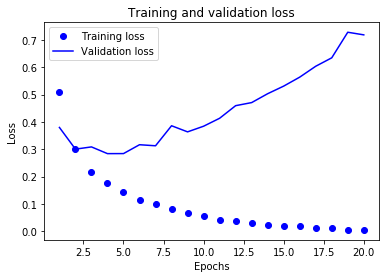

In [43]:
import matplotlib.pyplot as plt

val_binary_accuracy = history.history['val_binary_accuracy']
binary_accuracy = history.history['binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(binary_accuracy) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

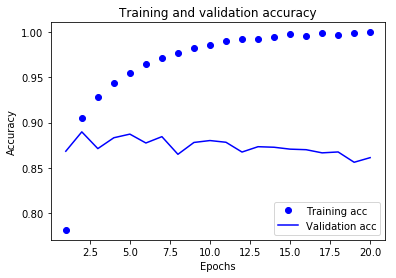

In [45]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, binary_accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_binary_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


The dots are the training loss and accuracy, while the solid lines are the validation loss and accuracy. Note that your own results may vary 
slightly due to a different random initialization of your network.

As you can see, the training loss decreases with every epoch and the training accuracy increases with every epoch. That's what you would 
expect when running gradient descent optimization -- the quantity you are trying to minimize should get lower with every iteration. But that 
isn't the case for the validation loss and accuracy: they seem to peak at the fourth epoch. This is an example of what we were warning 
against earlier: a model that performs better on the training data isn't necessarily a model that will do better on data it has never seen 
before. In precise terms, what you are seeing is "overfitting": after the second epoch, we are over-optimizing on the training data, and we 
ended up learning representations that are specific to the training data and do not generalize to data outside of the training set.

In this case, to prevent overfitting, we could simply stop training after three epochs. In general, there is a range of techniques you can 
leverage to mitigate overfitting, which we will cover in the next chapter.

Let's train a new network from scratch for four epochs, then evaluate it on our test data:

In [46]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 74us/step - loss: 0.4750 - acc: 0.8216
Epoch 2/4
25000/25000 [==============================] - 2s 66us/step - loss: 0.2652 - acc: 0.9096
Epoch 3/4
25000/25000 [==============================] - 2s 66us/step - loss: 0.1983 - acc: 0.9302
Epoch 4/4
25000/25000 [==============================] - 2s 77us/step


In [47]:
results

[0.32342941537857056, 0.87296]

Here's some take away from this example:

* There's usually quite a bit of preprocessing you need to do on your raw data in order to be able to feed it -- as tensors -- into a neural 
network. In the case of sequences of words, they can be encoded as binary vectors -- but there are other encoding options too.
* Stacks of `Dense` layers with `relu` activations can solve a wide range of problems (including sentiment classification), and you will 
likely use them frequently.
* In a binary classification problem (two output classes), your network should end with a `Dense` layer with 1 unit and a `sigmoid` activation, 
i.e. the output of your network should be a scalar between 0 and 1, encoding a probability.
* With such a scalar sigmoid output, on a binary classification problem, the loss function you should use is `binary_crossentropy`.
* The `rmsprop` optimizer is generally a good enough choice of optimizer, whatever your problem. That's one less thing for you to worry 
about.
* As they get better on their training data, neural networks eventually start _overfitting_ and end up obtaining increasingly worse results on data 
never-seen-before. Make sure to always monitor performance on data that is outside of the training set.



### Reference
This notebook contains the code sample found in [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff).
